# College forum posting dataset

<img src="images/graphs228.png" alt="" style="width: 400px;"/>


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import networkx as nx

import numpy as np
import pandas as pd

path = 'data/dc24/'

## Create a graph from the pandas DataFrame

Let's start by creating a graph from a pandas DataFrame. In this exercise, you'll create a new **bipartite graph** by looping over the `edgelist` (which is a DataFrame object).

For simplicity's sake, in this graph construction procedure, any edge between a student and a forum node will be the 'last' edge (in time) that a student posted to a forum over the entire time span of the dataset, though there are ways to get around this.

Additionally, to shorten the runtime of the exercise, we have provided a sub-sampled version of the edge list as data.

In [23]:
data = pd.read_csv(path+'data2.csv', index_col=0)
data.head()

,student,forum,date
13275,s397,f287,2004-05-31 00:34:50
2677,s55,f19,2004-05-19 22:29:05
29120,s17,f43,2004-08-15 18:03:05
13722,s397,f427,2004-05-31 15:11:06
14385,s484,f340,2004-05-31 22:30:14


In [24]:
# Instantiate a new Graph: G
G = nx.Graph()

In [25]:
# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')

In [26]:
dict(list(G.nodes().items())[:10])

{'s397': {'bipartite': 'student'},
 's55': {'bipartite': 'student'},
 's17': {'bipartite': 'student'},
 's484': {'bipartite': 'student'},
 's167': {'bipartite': 'student'},
 's354': {'bipartite': 'student'},
 's332': {'bipartite': 'student'},
 's47': {'bipartite': 'student'},
 's381': {'bipartite': 'student'},
 's65': {'bipartite': 'student'}}

In [27]:
dict(list(G.nodes().items())[-10:])

{'f502': {'bipartite': 'forum'},
 'f501': {'bipartite': 'forum'},
 'f351': {'bipartite': 'forum'},
 'f213': {'bipartite': 'forum'},
 'f79': {'bipartite': 'forum'},
 'f204': {'bipartite': 'forum'},
 'f200': {'bipartite': 'forum'},
 'f446': {'bipartite': 'forum'},
 'f400': {'bipartite': 'forum'},
 'f449': {'bipartite': 'forum'}}

In [28]:
G.edges()

EdgeView([])

In [31]:
# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date'])

In [35]:
list(G.edges(data=True))[:10]

[('s397', 'f287', {'date': '2004-05-31 15:45:08'}),
 ('s397', 'f427', {'date': '2004-05-31 15:11:06'}),
 ('s397', 'f73', {'date': '2004-05-24 23:33:06'}),
 ('s397', 'f63', {'date': '2004-05-26 01:26:21'}),
 ('s397', 'f336', {'date': '2004-06-04 22:22:10'}),
 ('s397', 'f82', {'date': '2004-06-04 19:20:18'}),
 ('s397', 'f377', {'date': '2004-05-30 14:33:37'}),
 ('s55', 'f19', {'date': '2004-05-26 10:16:55'}),
 ('s55', 'f169', {'date': '2004-05-31 18:07:39'}),
 ('s17', 'f43', {'date': '2004-09-18 20:44:34'})]

## Visualize the degree centrality distribution of the students projection

In this exercise, you will `visualize the degree centrality distribution of the students projection`.

In [37]:
# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']
student_nodes[:10]

['s397', 's55', 's17', 's484', 's167', 's354', 's332', 's47', 's381', 's65']

In [42]:
# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)
list(G_students.edges(data=True))[:10]

[('s397', 's270', {}),
 ('s397', 's243', {}),
 ('s397', 's286', {}),
 ('s397', 's693', {}),
 ('s397', 's398', {}),
 ('s397', 's736', {}),
 ('s397', 's571', {}),
 ('s397', 's34', {}),
 ('s397', 's567', {}),
 ('s397', 's260', {})]

In [48]:
# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)
dict(list(dcs.items())[-10:])

{'s90': 0.018018018018018018,
 's436': 0.012012012012012012,
 's694': 0.0,
 's287': 0.018018018018018018,
 's30': 0.018018018018018018,
 's42': 0.006006006006006006,
 's836': 0.018018018018018018,
 's259': 0.015015015015015015,
 's749': 0.003003003003003003,
 's166': 0.012012012012012012}

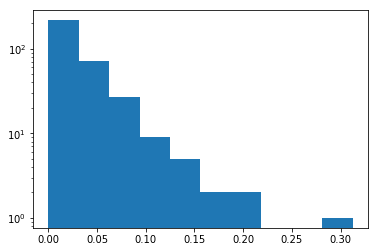

In [51]:
# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show();

## Visualize the degree centrality distribution of the forums projection

This exercise is also to reinforce the concepts of degree centrality and projections. This time round, you'll `plot the degree centrality distribution for the 'forum' projection`. Follow the same steps as in the previous exercise!

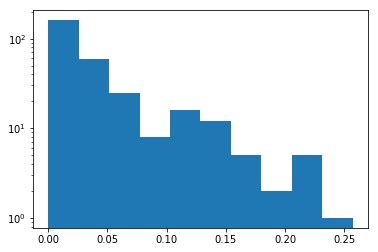

In [52]:
# Import necessary modules
import matplotlib.pyplot as plt 
import networkx as nx

# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show();